<a href="https://colab.research.google.com/github/Anis5221/PR-AI-with-Python-core/blob/main/Copy_of_Convolution_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [ ]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Download a file based on its file ID.
#https://drive.google.com/file/d/1QG2_2y-0CPbIzKRtngT7FLCOG-yLEItT/view?usp=sharing
# A file ID looks like:1QG2_2y-0CPbIzKRtngT7FLCOG-yLEItT
file_id = '1QG2_2y-0CPbIzKRtngT7FLCOG-yLEItT'

downloaded = drive.CreateFile({'id': file_id})

In [ ]:
downloaded.GetContentFile('Number.tar')

In [ ]:
!tar xvf Number.tar

Number/
Number/0/
Number/0/18 (177).jpg
Number/0/18 (178).jpg
Number/0/18 (179).jpg
Number/0/18 (180).jpg
Number/0/18 (181).jpg
Number/0/18 (182).jpg
Number/0/18 (183).jpg
Number/0/18 (184).jpg
Number/0/18 (185).jpg
Number/0/18 (186).jpg
Number/0/18 (187).jpg
Number/0/18 (24).jpg
Number/0/18 (25).jpg
Number/0/18 (26).jpg
Number/0/18 (27).jpg
Number/0/18 (28).jpg
Number/0/18 (29).jpg
Number/0/18 (30).jpg
Number/0/18 (31).jpg
Number/0/18 (32).jpg
Number/0/18 (33).jpg
Number/0/3372.jpg
Number/0/3373.jpg
Number/0/3374.jpg
Number/0/3375.jpg
Number/0/3376.jpg
Number/0/3377.jpg
Number/0/3378.jpg
Number/0/3379.jpg
Number/0/3380.jpg
Number/0/3381.jpg
Number/0/3382.jpg
Number/0/3383.jpg
Number/0/3384.jpg
Number/0/3385.jpg
Number/0/3386.jpg
Number/0/3387.jpg
Number/0/3388.jpg
Number/0/3389.jpg
Number/0/3390.jpg
Number/0/3391.jpg
Number/0/3392.jpg
Number/0/3393.jpg
Number/0/3394.jpg
Number/0/3395.jpg
Number/0/3396.jpg
Number/0/3397.jpg
Number/0/3398.jpg
Number/0/3399.jpg
Number/0/3400.jpg
Number/0

In [ ]:
pip install split-folders

In [ ]:
pip install split-folders tqdm

In [ ]:
import splitfolders 

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("/content/Number", output="/content/", seed=1337, ratio=(.8, .2), group_prefix=None) # default values

# Split val/test with a fixed number of items e.g. 100 for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
#splitfolders.fixed("input_folder", output="output", seed=1337, fixed=(100, 100), oversample=False, group_prefix=None) # default values

Copying files: 1270 files [00:00, 5494.12 files/s]


In [ ]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.preprocessing.image import ImageDataGenerator
import os
import keras
from keras.models import Sequential, load_model
from keras import optimizers
import glob
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization
from keras.layers import Activation, Dense

In [ ]:
PATH = '/content/train'

In [ ]:
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes) 

There are  10 classes:
 ['0', '2', '9', '1', '6', '8', '7', '5', '4', '3']


In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
for c in classes:
    print ("Class:", c)
    verify_images(os.path.join(PATH, c), delete=True);

Class: 0


Class: 2


Class: 9


Class: 1


Class: 6


Class: 8


Class: 7


Class: 5


Class: 4


Class: 3


In [ ]:
num_classes = 10
img_rows, img_cols = 225, 225
batch_size = 32

In [ ]:
train_data_dir = '/content/train'
validation_data_dir = '/content/val'

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

Found 1010 images belonging to 10 classes.
Found 259 images belonging to 10 classes.


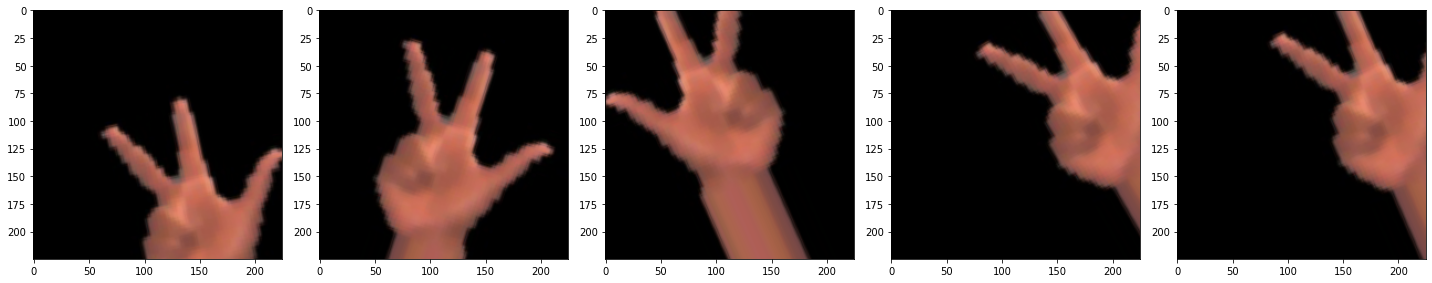

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


augmented_images = [train_generator[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
model = Sequential()

# First CONV-ReLU Layer
model.add(Conv2D(64, (3, 3), padding = 'same', input_shape = (img_rows, img_cols, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Second CONV-ReLU Layer
model.add(Conv2D(64, (3, 3), padding = "same", input_shape = (img_rows, img_cols, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Max Pooling with Dropout 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 3rd set of CONV-ReLU Layers
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

# 4th Set of CONV-ReLU Layers
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Max Pooling with Dropout 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 5th Set of CONV-ReLU Layers
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

# 6th Set of CONV-ReLU Layers
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Max Pooling with Dropout 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# First set of FC or Dense Layers
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Second set of FC or Dense Layers
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Final Dense Layer
model.add(Dense(num_classes))
model.add(Activation("softmax"))

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 225, 225, 64)      1792      
_________________________________________________________________
activation_36 (Activation)   (None, 225, 225, 64)      0         
_________________________________________________________________
batch_normalization_36 (Batc (None, 225, 225, 64)      256       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 225, 225, 64)      36928     
_________________________________________________________________
activation_37 (Activation)   (None, 225, 225, 64)      0         
_________________________________________________________________
batch_normalization_37 (Batc (None, 225, 225, 64)      256       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 112, 112, 64)     

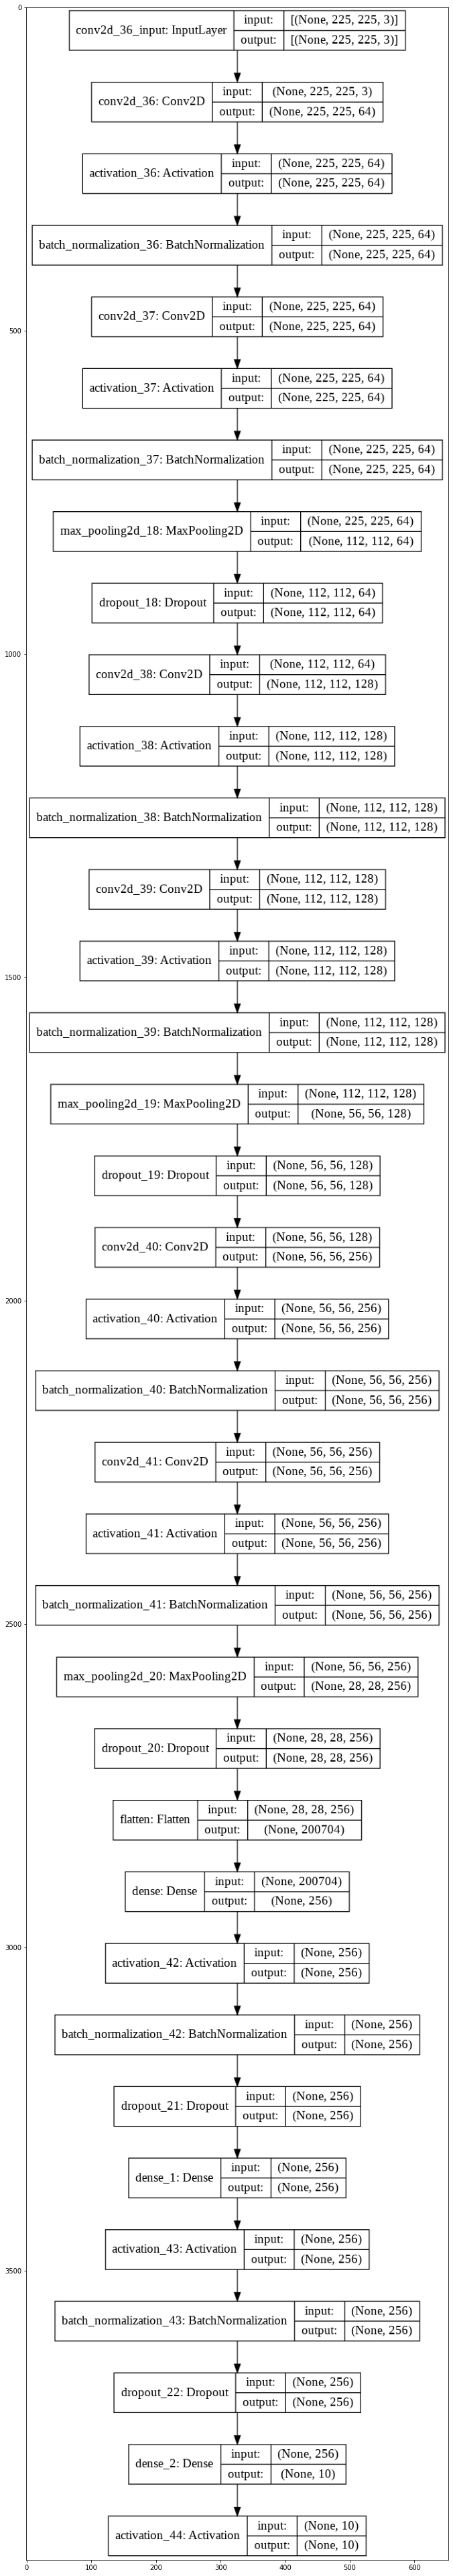

In [ ]:
%matplotlib inline
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plot_model(model, to_file='ClodDemo.png', show_shapes=True, show_layer_names=True)
img = mpimg.imread('ClodDemo.png')
plt.figure(figsize=(100,70))
imgplot = plt.imshow(img)

In [ ]:
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

                     
checkpoint = ModelCheckpoint("/content/mymodeltrain.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.00001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr=0.01),
              metrics = ['accuracy'])
#Found 1011 images belonging to 10 classes.
#Found 259 images belonging to 10 classes.
nb_train_samples = 1011
nb_validation_samples = 259
epochs = 20
#callbacks to use this simply replace the None to 'callbacks'
history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples//batch_size ,
    epochs = epochs,
    #callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples//batch_size)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
31/31 [==============================] - 26s 762ms/step - loss: 1.0618 - accuracy: 0.6176 - val_loss: 3.7292 - val_accuracy: 0.3086
Epoch 2/20
31/31 [==============================] - 24s 752ms/step - loss: 1.0213 - accuracy: 0.6278 - val_loss: 1.5368 - val_accuracy: 0.5156
Epoch 3/20
31/31 [==============================] - 24s 753ms/step - loss: 0.9870 - accuracy: 0.6258 - val_loss: 3.1732 - val_accuracy: 0.2383
Epoch 4/20
31/31 [==============================] - 24s 753ms/step - loss: 0.9656 - accuracy: 0.6493 - val_loss: 4.5001 - val_accuracy: 0.2734
Epoch 5/20
31/31 [==============================] - 23s 759ms/step - loss: 0.8180 - accuracy: 0.7106 - val_loss: 1.9577 - val_accuracy: 0.3906
Epoch 6/20
31/31 [==============================] - 24s 753ms/step - loss: 0.8640 - accuracy: 0.7014 - val_loss: 1.1999 - val_accuracy: 0.5391
Epoch 7/20
31/31 [==============================] - 24s 753ms/step - loss: 0.9280 - accuracy: 0.6544 - val_loss: 2.7131 - val_accuracy: 0.3438

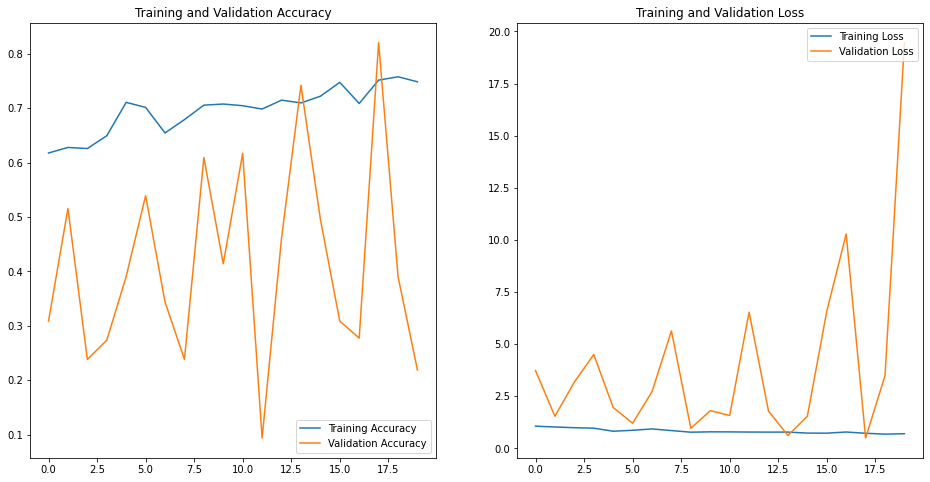

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Found 259 images belonging to 10 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[ 0  0  0  0 ...  0  0  0 25]
 [ 0  0  0  0 ...  0  0  0 31]
 [ 0  0  0  0 ...  0  0  0  6]
 [ 0  0  0  0 ...  0  0  0  6]
 ...
 [ 0  0  0  0 ...  0  0  0 32]
 [ 0  0  0  0 ...  0  0  0 18]
 [ 0  0  0  0 ...  0  0  0  4]
 [ 0  0  0  0 ...  0  0  0 35]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        23
           5       0.23      1.00      0.37        23
           6       0.00      0.00      0.00        32
           7       0.00      0.00      0.00        20
           8       0.00      0.00      0.00        20
           9       0.22      1.00      0.36        35

    accuracy                           0.22       259
   macro avg       0.04      0.20      0.07       259
wei

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


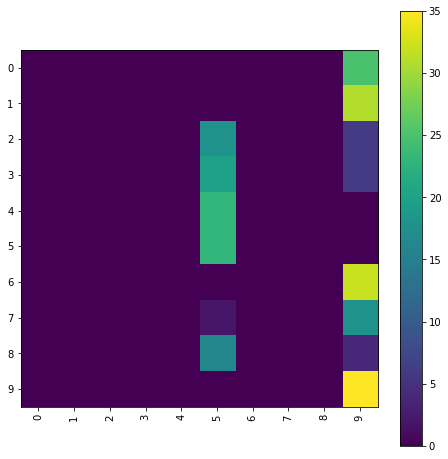

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# We need to recreate our validation generator with shuffle = false
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
#Found 76500 images belonging to 51 classes.
#Found 24431 images belonging to 51 classes.
nb_train_samples = 1011
nb_validation_samples = 259

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

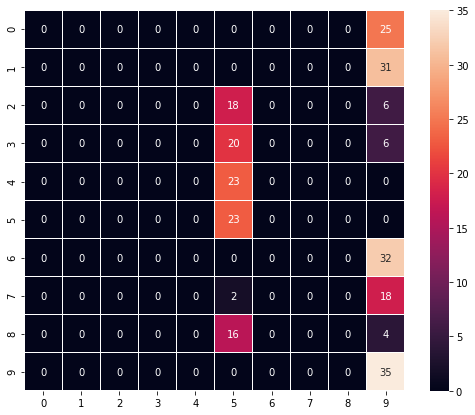

In [ ]:
import tensorflow as tf
import seaborn as sn
confusion_matrix = tf.math.confusion_matrix( validation_generator.classes, y_pred)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax,
    xticklabels=target_names, 
    yticklabels=target_names
)
plt.show()

In [ ]:
model.save('/content/model.hdf5')

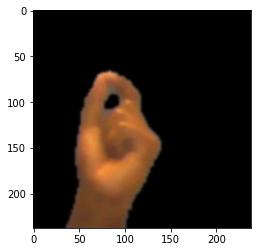

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

input_image_path = '/content/val/0/18 (26).jpg'

# Show our input Image for Feature visualization
img1 = image.load_img(input_image_path)
plt.imshow(img1);

img_size = (225, 225)
# load imamge into a 4D Tensor, convert it to a numpy array and expand to 4 dim
img1 = image.load_img(input_image_path, target_size = img_size)
image_tensor = image.img_to_array(img1)
#print(image_tensor.shape)
image_tensor = image_tensor/255
image_tensor = np.expand_dims(image_tensor, axis=0)
#print(img.shape)

In [ ]:
predict_x=model.predict(image_tensor) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

[9]


In [ ]:
from keras import models

# Extracts the top 8 layers
layer_outputs = [layer.output for layer in model.layers[:9]]

# Creates a model that returns these outputs given the model input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
activations = activation_model.predict(image_tensor)

In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 225, 225, 64)


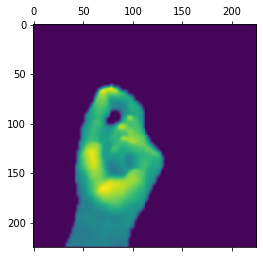

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


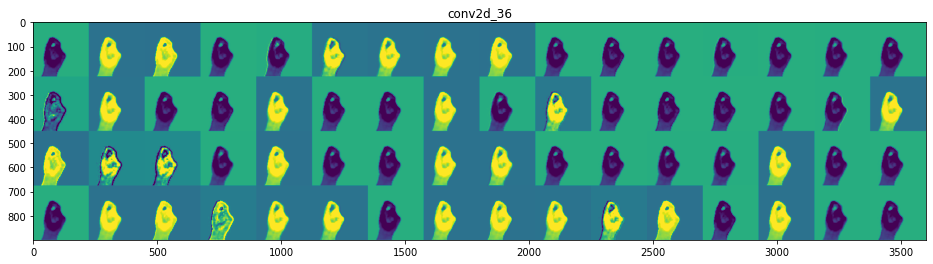

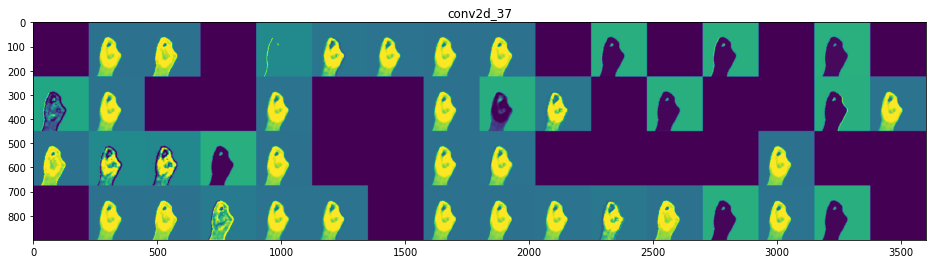

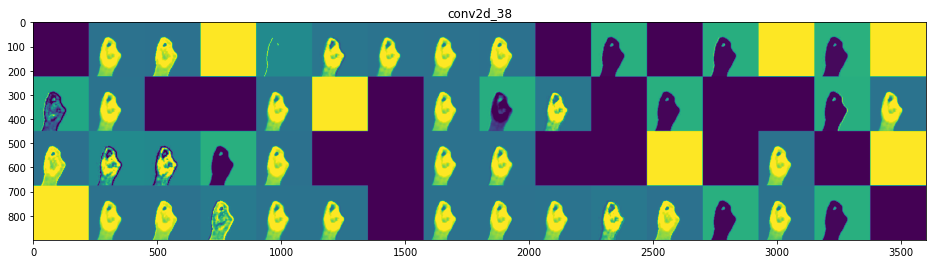

In [ ]:
layer_names = []
for layer in model.layers[:9]:
    layer_names.append(layer.name)
images_per_row = 16

# Get CONV layers only
conv_layer_names = []
for layer_name in layer_names:
    if 'conv2d' in layer_name:
        conv_layer_names.append(layer_name)

for layer_name, layer_activation in zip(conv_layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
            row * size : (row + 1) * size] = channel_image
            
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')